<a href="https://colab.research.google.com/github/josware/data-science-intermediate/blob/main/DS_AI_APPS_Intermediate_1_Kaggle_PortoSeguroInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS Intermediate Project 1 - Porto seguro (Kaggle)

https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview

## Problem Definition

### Description


Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

### First submission results

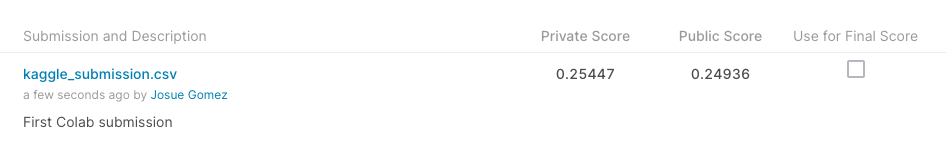

### Random Forest Benchmark:

Scope:

The focus here should be to get a just-good-enough model and interpret the relationship between the target and top predictors. In case of Porto Seguro dataset, you should beat the random forest benchmark (0.245 on Kaggle) but not much more - no need to get involved with competitive data science techniques (like model ensembles) at this point.

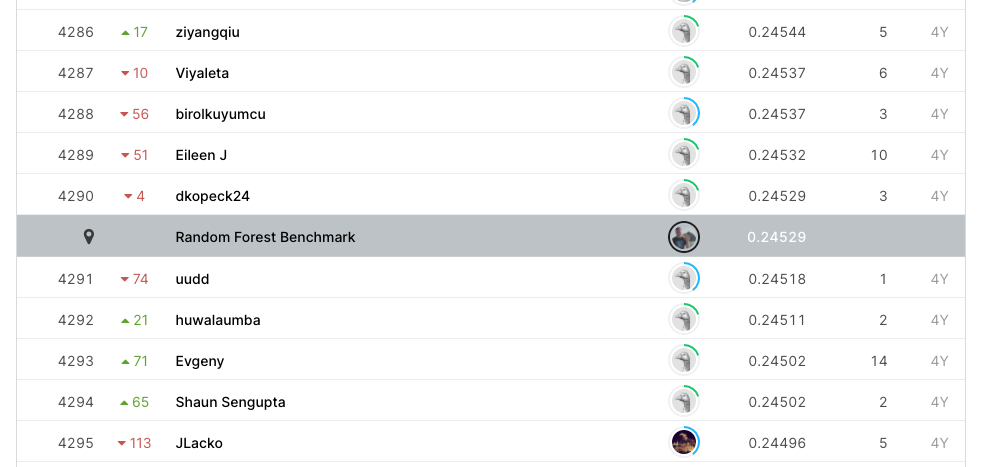

### Scoring Metric - Normalized Gini Coefficient

Submissions are evaluated using the Normalized Gini Coefficient.

During scoring, observations are sorted from the largest to the smallest predictions. Predictions are only used for ordering observations; therefore, the relative magnitude of the predictions are not used during scoring. The scoring algorithm then compares the cumulative proportion of positive class observations to a theoretical uniform proportion.

The Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score. The theoretical maximum for the discrete calculation is (1 - frac_pos) / 2.

The Normalized Gini Coefficient adjusts the score by the theoretical maximum so that the maximum score is 1.

The code to calculate Normalized Gini Coefficient in a number of different languages can be found in this forum thread.

https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703

i.e.

def gini(actual, pred, cmpcol = 0, sortcol = 1):

     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses

     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)
 
 def gini_normalized(a, p):

     return gini(a, p) / gini(a, a)


Credits to: https://www.kaggle.com/patrick7

### Submission file

For each id in the test set, you must predict a probability of an insurance claim in the target column. The file should contain a header and have the following format:

id,target
0,0.1
1,0.9
2,1.0
etc.

## Installing Requirements

### How to make a requirements.txt

tl;dr;

```
!pip freeze > requirements.txt
```
Credits: 
https://boscacci.medium.com/why-and-how-to-make-a-requirements-txt-f329c685181e

In [ ]:
#!pip freeze > requirements.txt


TODO: Define process to make a requirements.txt with only necessary modules i.e. upload it to drive similar to kaggle.json

### How to install a requirements.txt

tl;dr;

```
!pip install -r requirements.txt
```
Source:
https://stackoverflow.com/questions/50379804/install-dependencies-from-requirements-txt-in-google-colaboratory


In [ ]:
#TODO leave only required packages so !pip install -r /content/requirements.txt can work
#currently getting error
#Processing /dlib-19.18.0-cp37-cp37m-linux_x86_64.whl
#ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/dlib-19.18.0-cp37-cp37m-linux_x86_64.whl'

#!pip install -r /content/requirements.txt

### importing libraries


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


## Data

### Data Description
In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

### Files description

* train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
* test.csv contains the test data.
* sample_submission.csv is submission file showing the correct format.

### Getting Data Set from Kaggle
https://www.kaggle.com/general/74235

In [ ]:
#Colab se acuerda del acceso de drive y de la lllave... asegurandonos que esté ahí y dándole permiso
#!cp kaggle.json /root/.kaggle/kaggle.json
#!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#J05
#!pip install -q kaggle
#upload API key
#from google.colab import files
#files.upload()

In [ ]:
#Issue: Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.10 / client 1.5.4)

#The fix: https://stackoverflow.com/questions/58643979/google-colaboratory-use-kaggle-server-version-1-5-6-client-version-1-5-4-fai
!pip install --upgrade --force-reinstall --no-deps kaggle



  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
#!mkdir ~/.kaggle
! cp drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#if in below block you get 401 probably access token expired
#visit https://www.kaggle.com/josuegomez/account click expire download to your dis and upload a new one to drive

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18996       1475  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11586        807  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5959        389  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
! kaggle competitions download -c 'porto-seguro-safe-driver-prediction'

porto-seguro-safe-driver-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

drive					 sample_data
kaggle_submission_1.csv			 sample_submission
Kaggle_submission_mark2-1642750304.csv	 test
porto-seguro-safe-driver-prediction.zip  train


In [ ]:
! unzip porto-seguro-safe-driver-prediction.zip


Archive:  porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
! mkdir test
! mkdir train
! mkdir sample_submission

!mv train.csv train/
!mv test.csv test/
!mv sample_submission.csv sample_submission/


mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘sample_submission’: File exists


In [ ]:
#! mkdir test
#! mkdir train
#! mkdir sample_submission

#! unzip test.csv.zip -d test
#! unzip train.csv.zip -d train
#! unzip sample_submission.csv.zip -d sample_submission


In [ ]:
!head -5 train/train.csv

id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.7180703307999999,10,1,-1,0,1,4,1,0,0,1,12,2,0.4,0.8836789178,0.3708099244,3.6055512755000003,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.7660776723,11,1,-1,0,-1,11,1,1,2,1

In [ ]:
!head sample_submission/sample_submission.csv

id,target
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364
5,0.0364
6,0.0364
8,0.0364
10,0.0364


### Loading Data

In [ ]:
#import pandas as pd

In [ ]:
df_train = pd.read_csv("train/train.csv")
df_test = pd.read_csv("test/test.csv")

In [ ]:
#confiming train df is loaded
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
#confiming test df is loaded
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


### Data Quality (training dataframe)

#### Shape & info

In [ ]:
df_train.shape

(595212, 59)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

#### missing values (isnull)

In [ ]:
df_train.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


#### trying to find wrong entries

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
#https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
for col in df_train.columns:
    print('{} : {}'.format(col,df_train[col].unique()))

id : [      7       9      13 ... 1488017 1488021 1488027]
target : [0 1]
ps_ind_01 : [2 1 5 0 4 3 6 7]
ps_ind_02_cat : [ 2  1  4  3 -1]
ps_ind_03 : [ 5  7  9  2  0  4  3  1 11  6  8 10]
ps_ind_04_cat : [ 1  0 -1]
ps_ind_05_cat : [ 0  1  4  3  6  5 -1  2]
ps_ind_06_bin : [0 1]
ps_ind_07_bin : [1 0]
ps_ind_08_bin : [0 1]
ps_ind_09_bin : [0 1]
ps_ind_10_bin : [0 1]
ps_ind_11_bin : [0 1]
ps_ind_12_bin : [0 1]
ps_ind_13_bin : [0 1]
ps_ind_14 : [0 1 2 3 4]
ps_ind_15 : [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
ps_ind_16_bin : [0 1]
ps_ind_17_bin : [1 0]
ps_ind_18_bin : [0 1]
ps_reg_01 : [0.7 0.8 0.  0.9 0.6 0.5 0.4 0.3 0.2 0.1]
ps_reg_02 : [0.2 0.4 0.  0.6 1.8 0.1 0.7 1.4 0.9 0.3 0.5 0.8 1.  1.3 1.6 1.5 1.2 1.1
 1.7]
ps_reg_03 : [ 0.71807033  0.76607767 -1.         ...  1.60078106  1.63075903
  1.74355958]
ps_car_01_cat : [10 11  7  6  9  5  4  8  3  0  2  1 -1]
ps_car_02_cat : [ 1  0 -1]
ps_car_03_cat : [-1  0  1]
ps_car_04_cat : [0 1 8 9 2 6 3 7 4 5]
ps_car_05_cat : [ 1 -1  0]
ps_car_06_

#### Visualizing missing entries - none apparently

In [ ]:
#sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis')


We can observe no missing entries

#### Summary - Data Quality 

Data set does not present missing entries data is well structured and all is in numeric format seems to be ready for a Random Forest (regression)

## EDA - (Exploratory Data Analysis)

### What is an EDA?

Exploratory Data Analysis is a set of techniques that were developed by Tukey, John Wilder in 1970. The philosophy behind this approach was to examine the data before building a model. 

John Tukey encouraged statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. 

Today Data scientists and analysts spend most of their time in Data Wrangling and Exploratory Data Analysis also known as EDA.

Exploratory Data Analysis or EDA is used to take insights from the data. 
Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. 

Following things are part of EDA :

1.   Get maximum insights from a data set
2.   Uncover underlying structure
3.   Extract important variables from the dataset
4.   Detect outliers and anomalies(if any)
5.   Test underlying assumptions
6.   Determine the optimal factor settings


Source: https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/ 

#### Describe training data

In [ ]:
df_train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

#### Correlation

Finding negative values --- assuming missing





In [ ]:
df_train.corr()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,-0.002208,-0.001261,-0.001210,-0.000177,-0.001718,-0.001129,-0.001935,-0.000500,0.001344,0.000816,-0.000999,-0.003829,-0.000976,-0.001052,-0.000403,0.000354,0.002310,-0.000850,-0.001010,-0.002956,0.000748,0.000494,-0.000928,0.002047,0.002641,0.001007,0.001944,-0.000737,0.000709,-0.000331,0.000719,-0.000451,3.638318e-03,-0.000592,0.000957,0.000788,0.000836,0.000518,9.805336e-04,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031534,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000

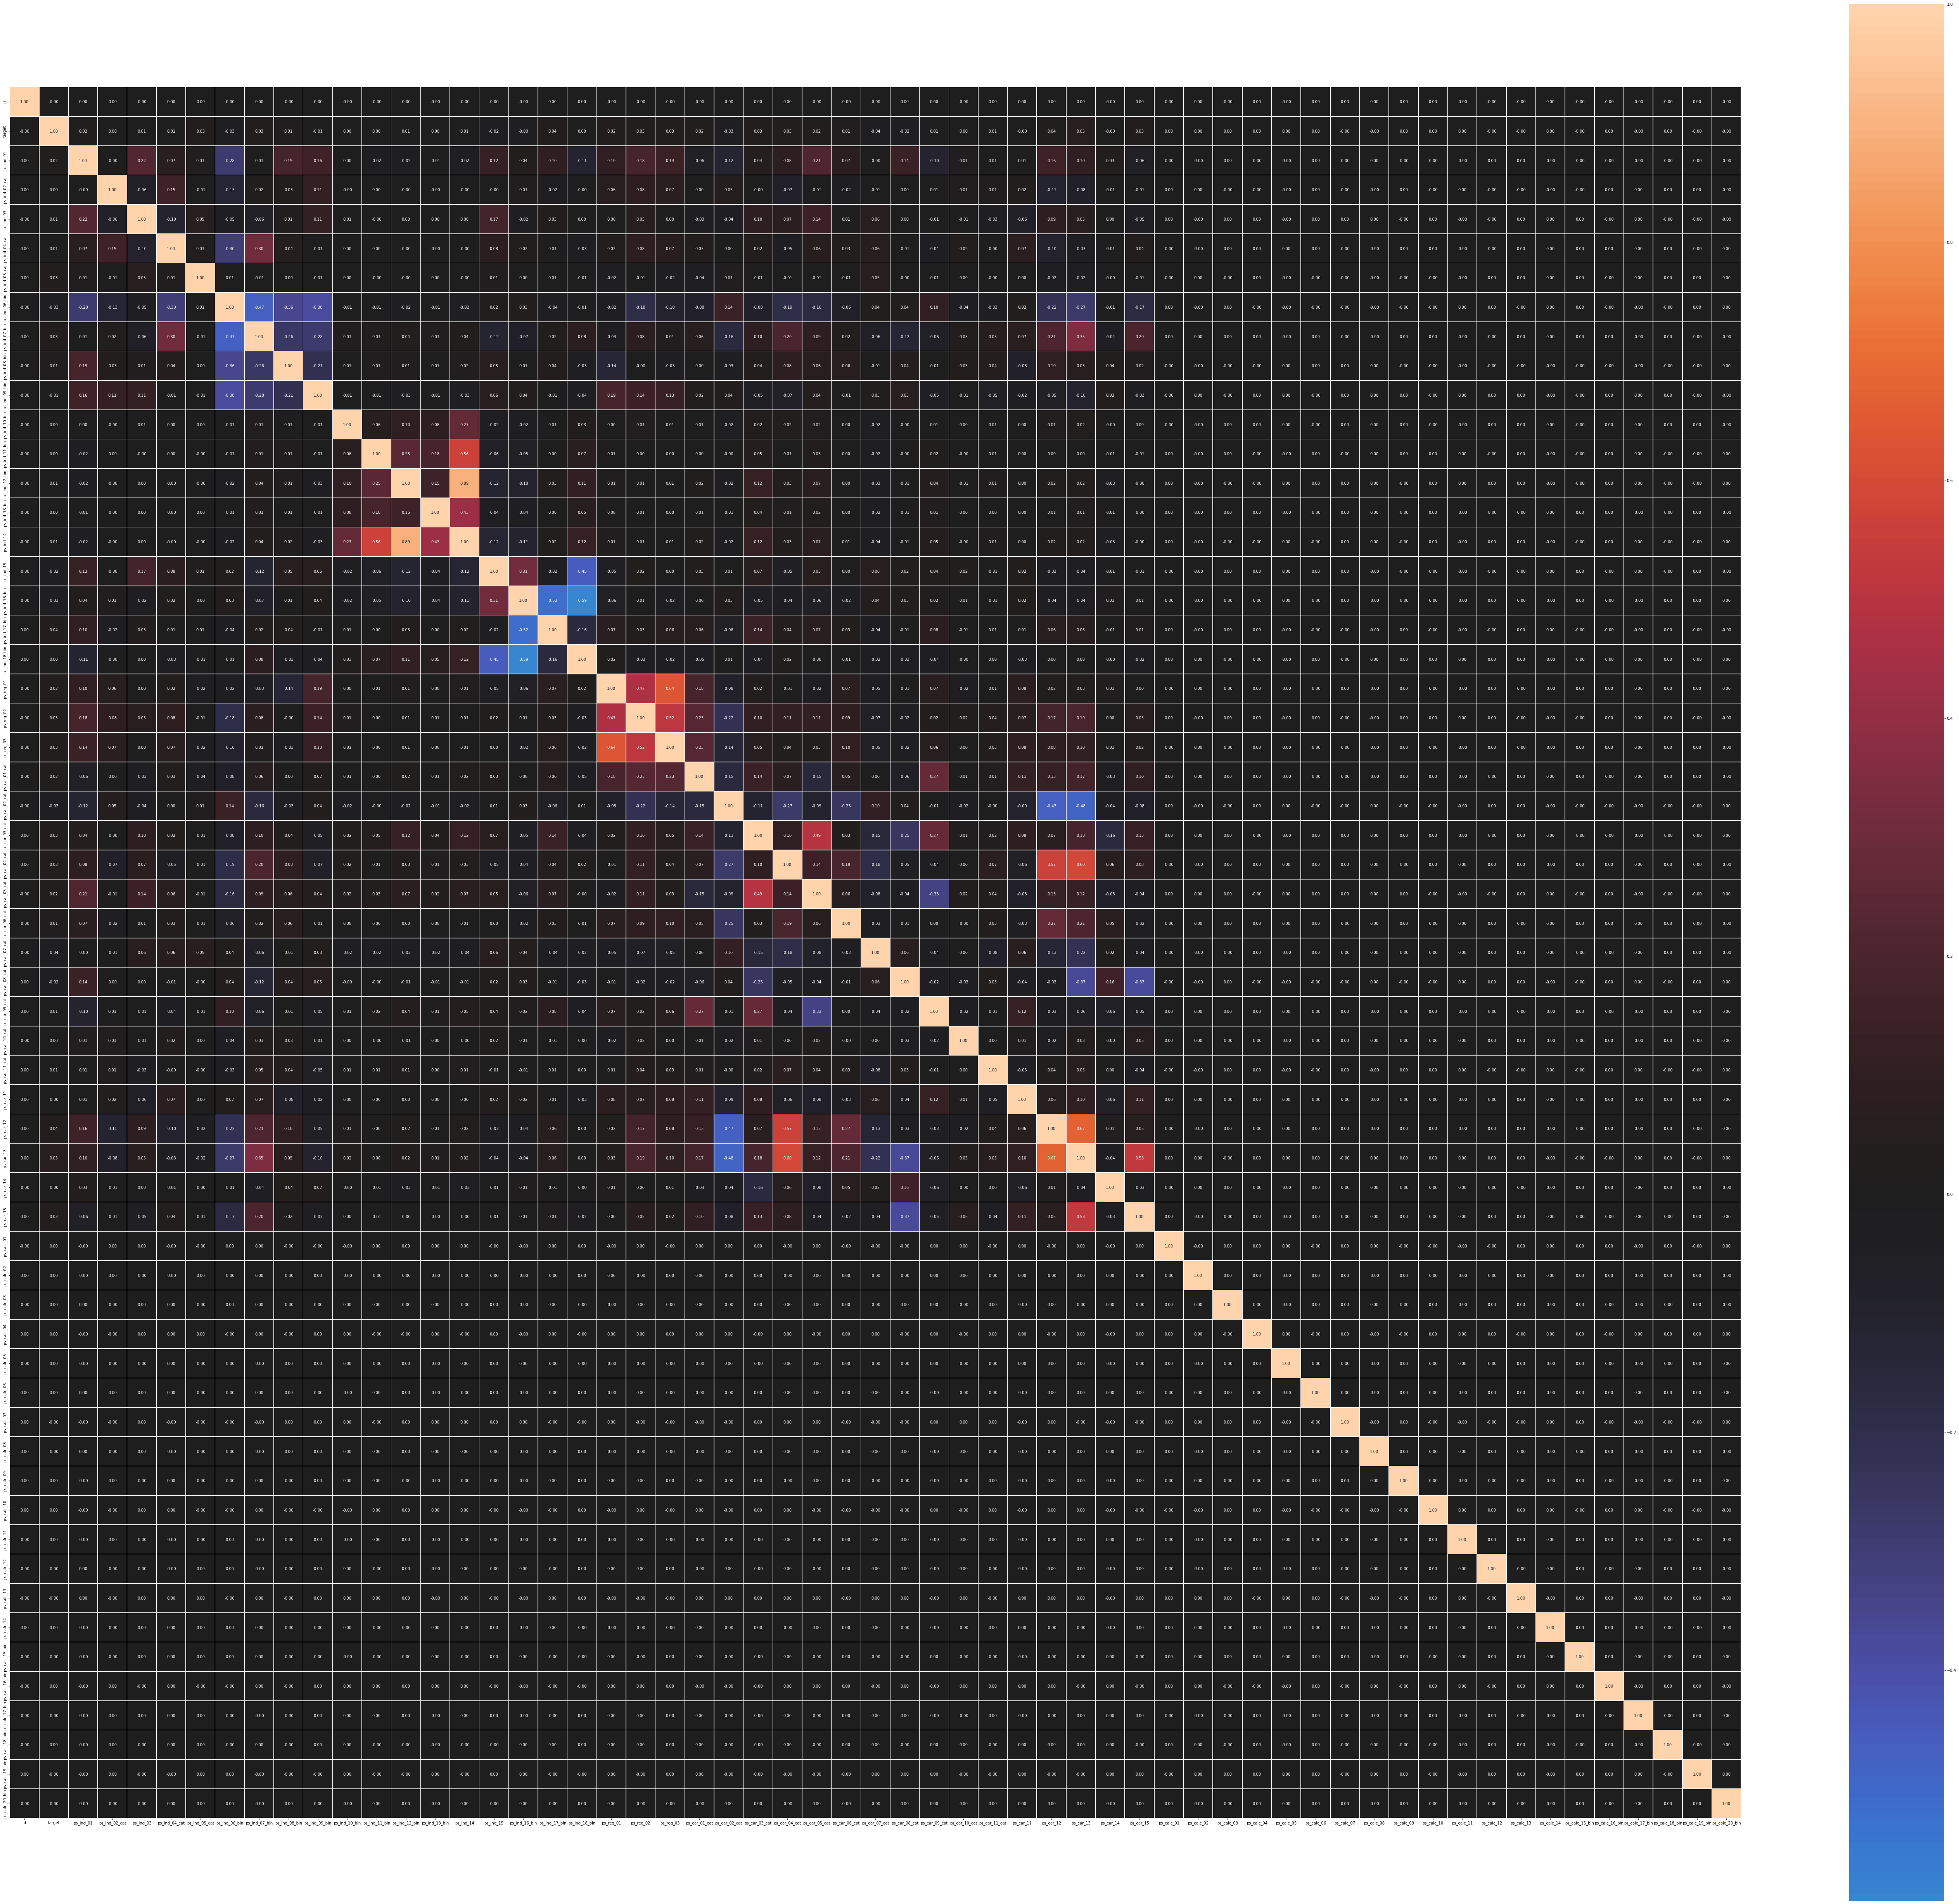

In [ ]:
def correlation_heatmap(df_train):
    correlations = df_train.corr()

    fig, ax = plt.subplots(figsize=(100,100))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .90})
    plt.show();
    
correlation_heatmap(df_train)

#### Inbalanced Data

In [ ]:
count_target_class = df_train['target'].value_counts()
print("Percent of Insurance Claimed (Class 1) : ", (count_target_class[1]/df_train.shape[0]*100))
print("Percent of Insurance NOT Claimed (Class 0) : ", (count_target_class[0]/df_train.shape[0]*100))

Percent of Insurance Claimed (Class 1) :  3.6447517859182947
Percent of Insurance NOT Claimed (Class 0) :  96.3552482140817


## Feature Engineering

### TBD

## Data Preparation (based on EDA and Feature Engineering)

In [ ]:
#As per EDA finding replacing -1
#df_train.fillna(-1, inplace=True)
#df_train.fillna(-1, inplace=True)

## Machine Learning

### Random Forest (Classifier)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df_train.drop('target',axis=1)
y = df_train['target']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9634472794068233


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#### Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


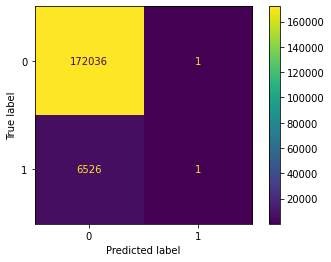

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

#### Submission code

In [ ]:
#Making sure we can scale by adding a timestamp to every submission
ts = time.time()
ts = str(round(ts))
filename  = "Kaggle_submission_mark2-"+ts+".csv"
print(filename)

Kaggle_submission_mark2-1642751210.csv


In [ ]:
df2submit = pd.DataFrame(columns=['id', 'target'])
df2submit['id'] = df_test['id'].values
df2submit['target'] = clf.predict_proba(df_test)[:, 1] 

df2submit.to_csv(path_or_buf = filename,
              sep = ',',
              index = False,
              encoding = 'utf8')

In [ ]:
!head {filename}
#!head $filename #also works

id,target
0,0.08
1,0.11
2,0.1
3,0.06
4,0.16
5,0.09
6,0.06
8,0.13
10,0.13


In [ ]:
!kaggle competitions submit -c porto-seguro-safe-driver-prediction -f {filename} -m {filename}

100% 10.4M/10.4M [00:00<00:00, 31.3MB/s]
Successfully submitted to Porto Seguro’s Safe Driver Prediction

## Results

### TBD

## Discussion

### Imbalanced data set, 3 approaches:





1.   Stratefied k folds
2.   Artificial samples - SMOTE (Syntentyc samplyc generation)
3.   Undersampling, 




### Classification metrics

We need to make sure accuracy is measured for each class

### Data tips

* Scale your data
* i.e. numb of room 1 digit, price will be in millions (will skew)
* you neeed to scale your data (normalization, 0 to 1)
* Scaling also helps


TODO:
Apply both to this DS
To make sure is not skew

Random Forest handles it out of the box


* Correlation: Drop the ones highly correlated?

* DO PCA
* Fwd bwd Lasso --- get rid of this issues (high correlation)



## Archive

#### Mark 1

In [ ]:
def cross_val_model(X,y, model, n_splits=3):
    'Do split dataset and calculate cross_score'
    X = np.array(X)
    y = np.array(y)
    folds = list(StratifiedKFold(n_splits=n_splits,
                                 shuffle=True,
                                 random_state=2017).split(X, y))

    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]

        print ("Fit %s fold %d" % (str(model).split('(')[0], j+1))
        model.fit(X_train, y_train)
        cross_score = cross_val_score(model, X_holdout, y_holdout, cv=3, scoring='roc_auc')
        print("    cross_score: %.5f" % cross_score.mean())

#Source: https://github.com/brunocampos01/porto-seguro-safe-driver-prediction/blob/master/notebooks/porto_seguro_safe_driver.ipynb

In [ ]:
#RandomForest params
rf_params = {}
rf_params['n_estimators'] = 200
rf_params['max_depth'] = 6
rf_params['n_jobs'] = -1 # run all process

In [ ]:
# create model
rf_model = RandomForestClassifier(**rf_params)

# training model
X = df_train.drop('target',axis=1)
y = df_train['target']

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cross_val_model(X, y, rf_model)

Fit RandomForestClassifier fold 1
    cross_score: 0.52030
Fit RandomForestClassifier fold 2
    cross_score: 0.59211
Fit RandomForestClassifier fold 3
    cross_score: 0.57688


#### Submission code

In [ ]:
#Making sure we can scale by adding a timestamp to every submission
ts = time.time()
ts = str(round(ts))
filename  = "Kaggle_submission_mark1-"+ts+".csv"
print(filename)

Kaggle_submission_mark1-1642752139.csv


In [ ]:
df2submit = pd.DataFrame(columns=['id', 'target'])
df2submit['id'] = df_test['id'].values
#Adding the model rf_model
df2submit['target'] = rf_model.predict_proba(df_test)[:, 1] 

df2submit.to_csv(path_or_buf = filename,
              sep = ',',
              index = False,
              encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
!head {filename}
#!head $filename #also works

id,target
0,0.04488673937242862
1,0.051593950194525055
2,0.04270940923467733
3,0.056046171222152406
4,0.03947988269443517
5,0.05682683916401851
6,0.04727092664369206
8,0.07107614639279095
10,0.07102604659608276


In [ ]:
!kaggle competitions submit -c porto-seguro-safe-driver-prediction -f {filename} -m {filename}

100% 23.5M/23.5M [00:00<00:00, 46.0MB/s]
Successfully submitted to Porto Seguro’s Safe Driver Prediction